# やりたいこと
①カレンダーの10AMといった画像を読み込み

②(256, 64)にリサイズ

③左端から(64, 64)で切り出す

④x=32に線を引く

⑤線が文字列を分割しているか、自分で判断する

⑥文字列を分割できていたら1,できていなかったら0を書き込む（ラベリングしている）

⑦⑥に従って、それぞれのフォルダに保存する

⑧切り出す部分を4pxずつ左方向にずらしながら、③～⑦を繰り返す。

→これをフォルダの画像まとめて行う

### ライブラリのインポート

In [1]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
%matplotlib inline

## オリジナル画像

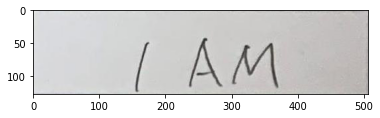

In [ ]:
img = Image.open('/content/drive/MyDrive/DS入門講座/data/test/トリミングテスト/raw/1am/1am_001.jpg')
plt.imshow(img)

### リサイズ

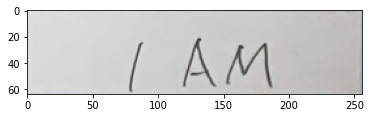

In [ ]:
img = img.resize((256, 64))
plt.imshow(img)

In [ ]:
type(img), img.size

(PIL.Image.Image, (256, 64))

グレースケールに変換かつNumpyに変換

In [ ]:
img_gray = np.array(img.convert('L'))
type(img_gray), img_gray.shape

(numpy.ndarray, (64, 256))

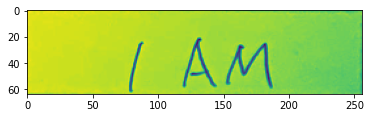

In [ ]:
plt.imshow(img_gray)

しきい値と比較

In [ ]:
thresh = 128 #しきい値

img_bool = img_gray > thresh #しきい値より
img_bool

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Trueは1、Falseは0とみなされるため、任意の値をかけると、比較した結果がTrueの画素値はその値、Falseの画素値は0となる。例のように符号なし8ビット（uint8）のMax値255をかけると、Trueは255（白）、Falseは0（黒）となる。

In [ ]:
maxval = 255

img_bin = (img_gray > thresh) * maxval
img_bin

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

ndarrayを画像に変換する

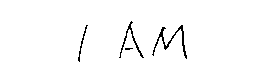

In [ ]:
Image.fromarray(np.uint8(img_bin))

In [ ]:
img_gray = img.convert("L")                     # グレイスケールに変換
img_bin = img_gray.point(lambda x: 0 if x < 128 else x)   # 値が230以下は0になる

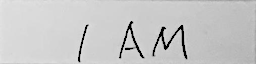

In [ ]:
img_bin

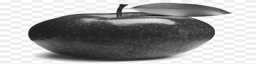

In [ ]:
apple = Image.open('/content/drive/MyDrive/DS入門講座/data/test/interim/apple1.jpg')
apple_gray = apple.convert('L')
apple_gray

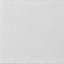

In [ ]:
img_crop = img_bin.crop((0, 0, 64, 64))
img_crop

(64, 64)

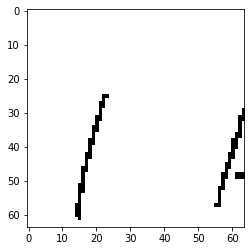

In [ ]:
img = Image.open('/content/drive/MyDrive/DS入門講座/data/test/トリミングテスト/raw/1am/1am_001.jpg')  #読み込み
img = img.resize((256, 64))  #リサイズ
img = img.convert("L")                     # グレイスケールに変換
img = img.point(lambda x: 0 if x < 128 else 256) 
img = img.crop((64, 0, 128, 64)) 
plt.imshow(img)
plt.gray()
img.size

In [ ]:
!python -V

Python 3.7.11


In [ ]:
x = 1
str(x).zfill(4)

'0001'

In [108]:
class CreateData:
    def __init__(self, label_list:list, convert_size:tuple, thresh:int, x_step:int) -> None:
        self.label_list = label_list #指定するラベルのリスト
        self.convert_size = convert_size #リサイズするサイズ
        self.thresh = thresh #2値化のしきい値
        self.x_step = x_step #バッチを移動する距離

    def create_data(self, input_file_path:str, output_path:str) -> None:

        #../data/label/name.jpg→name.jpgのファイルの数を数える→辞書に格納する
        label_file_num_dict = {}
        for label in self.label_list:
            output_label_path = os.path.join(output_path, label)
            os.makedirs(output_label_path, exist_ok=True)  # エクスポートするディレクトリを作成する、既にある場合は何もしない
            label_file_num_dict[label] = sum(os.path.isfile(os.path.join(output_label_path, name)) for name in os.listdir(output_label_path)) #ラベルディレクトリごとのファイル数を数え、辞書に格納

        img = Image.open(input_file_path)  #読み込み
        img = img.resize(self.convert_size)  #リサイズ
        img = img.convert("L")                     # グレイスケールに変換
        img = img.point(lambda x: 0 if x < self.thresh else 256)   # 2値化。値がthresh以下は0になる、ほかは256

        #関数内関数
        #ラベルを入力する部分
        def input_label():
            data_label = input()
            str_label = str(data_label)   #線が引けるなら1、引けないなら2を入力
            if str_label in self.label_list:
                return str_label
            else:
                print('正しい値を入力してください')
                input_label()

        for x_num in range(0, self.convert_size[0] - self.convert_size[1], self.x_step):
            img_crop = img.crop((x_num, 0, x_num + self.convert_size[1], self.convert_size[1]))
            draw = ImageDraw.Draw(img_crop)
            draw.line(((self.convert_size[0] / 2, 0), (self.convert_size[0] / 2, self.convert_size[1])))  #真ん中に線を引く
            plt.imshow(img_crop)
            plt.gray()
            plt.show()
            data_label = input_label()
            label_file_num_dict[data_label] += 1 #ラベルのファイル数を一つ増やす
            img_crop.save(os.path.join(output_path, data_label +'/' + data_label + '-' + str(label_file_num_dict[data_label]).zfill(4) + '.jpg'))

In [109]:
create_data = CreateData(label_list=['0', '1'], convert_size=(256, 64), thresh=128, x_step=64)

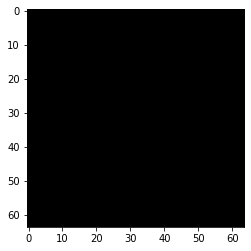

0


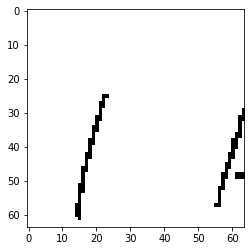

1


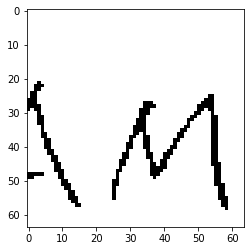

0


In [110]:
create_data.create_data(input_file_path='/content/drive/MyDrive/DS入門講座/data/test/トリミングテスト/raw/1am/1am_001.jpg', output_path='/content/drive/MyDrive/DS入門講座/data/test/トリミングテスト/interim')

In [76]:
input_label = input()
str_label = str(input_label)   #線が引けるなら1、引けないなら2を入力
if str_label in ['0', '1']:
    print(str_label)
else:
    print('正しい値を入力してください')

0
0
